In [1]:
from umap_ import *
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline
import seaborn as sns
import umap.umap_ as umap
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy 
import networkx as nx
# import plotly.graph_objects as go
import math
# import plotly
sns.set(style='white', context='poster', rc={'figure.figsize':(10,8)})

/home/abhishek/.local/lib/python3.8/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


In [2]:
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# Separating out the features
f = df.loc[:, features].values
# Separating out the target
t = df.loc[:,['target']].values
# Standardizing the features
f = StandardScaler().fit_transform(f)

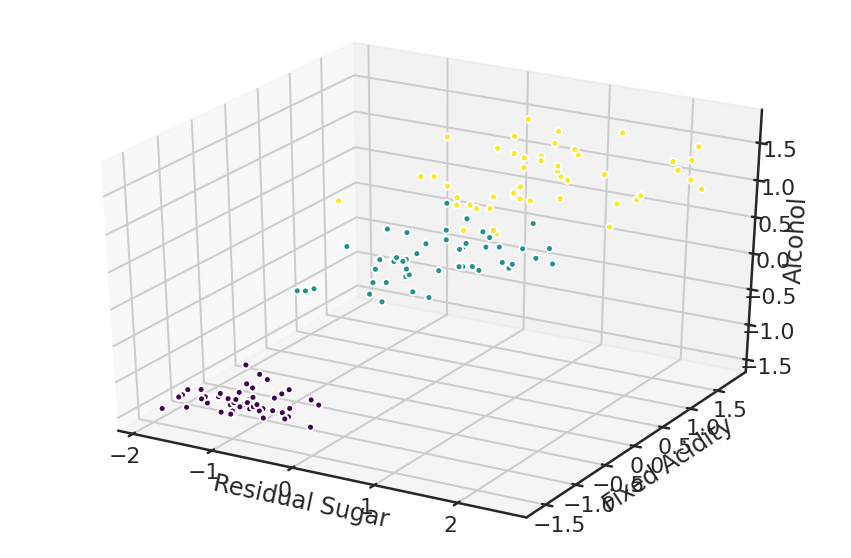

In [3]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs = f[:,0]
ys = f[:,2]
zs = f[:,3]
ax.scatter(xs, ys, zs, c= t, cmap = 'viridis', s=50, alpha=1, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')

plt.show()

In [4]:
mapper = umap.UMAP(n_neighbors=40,min_dist=0.1).fit(df)

# t1 = []
# for x in t:
#     for y in x:
#         t1.append(int(y))
        
# t1 = np.asarray(t1)
# t1.shape
coo_graph = mapper.graph_.tocoo()


In [5]:
Z = nx.from_scipy_sparse_matrix(coo_graph,edge_attribute='weight')

In [6]:
Z[0][1]

{'weight': 0.014824025}

In [7]:
# Z.nodes(data='True')

In [8]:
edges = Z.edges()
weights = [Z[u][v]['weight'] for u,v in edges]

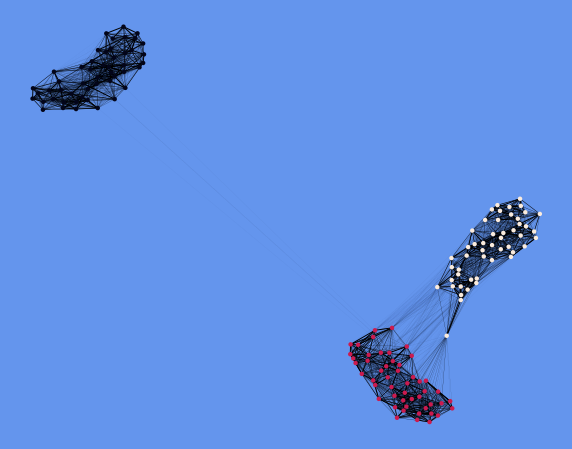

In [32]:
fig, ax = plt.subplots()
nx.draw_networkx(Z,width=weights,with_labels=False, node_size=6, node_color=t,edge_color='black',)
# ax.set_facecolor('black')
ax.axis('off')
fig.set_facecolor('cornflowerblue')
plt.show()